In [2]:
pip install scikit-fuzzy

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

wind=ctrl.Antecedent(np.arange(0.7,3.2,0.1),'wind')
temperature=ctrl.Antecedent(np.arange(20.4,40.3,0.1),'temperature')
rainfall=ctrl.Consequent(np.arange(0.2,9.2,0.1),'rainfall')

wind['very_low']=fuzz.trimf(wind.universe,[0.7,1.1,1.5])
wind['low']=fuzz.trimf(wind.universe,[1.1,1.5,1.9])
wind['normal']=fuzz.trimf(wind.universe,[1.5,1.9,2.3])
wind['high']=fuzz.trimf(wind.universe,[1.9,2.3,2.7])
wind['very_high']=fuzz.trimf(wind.universe,[2.3,2.7,3.1])

temperature['very_low']=fuzz.trimf(temperature.universe,[20.4,23.6,26.8])
temperature['low']=fuzz.trimf(temperature.universe,[23.6,26.8,30])
temperature['normal']=fuzz.trimf(temperature.universe,[26.8,30,33.2])
temperature['high']=fuzz.trimf(temperature.universe,[30,33.2,36.4])
temperature['very_high']=fuzz.trimf(temperature.universe,[33.2,36.4,39.6])

rainfall['very_low']=fuzz.trimf(rainfall.universe,[0.2,1.7,3.2])
rainfall['low']=fuzz.trimf(rainfall.universe,[1.7,3.2,4.7])
rainfall['normal']=fuzz.trimf(rainfall.universe,[3.2,4.7,6.2])
rainfall['high']=fuzz.trimf(rainfall.universe,[4.7,6.2,7.7])
rainfall['very_high']=fuzz.trimf(rainfall.universe,[6.2,7.7,9.2])

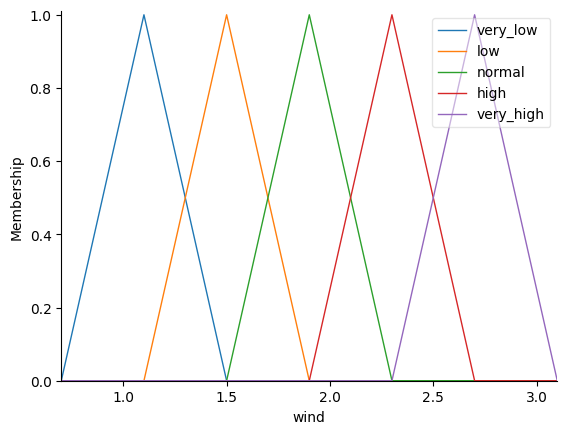

In [8]:
wind.view()

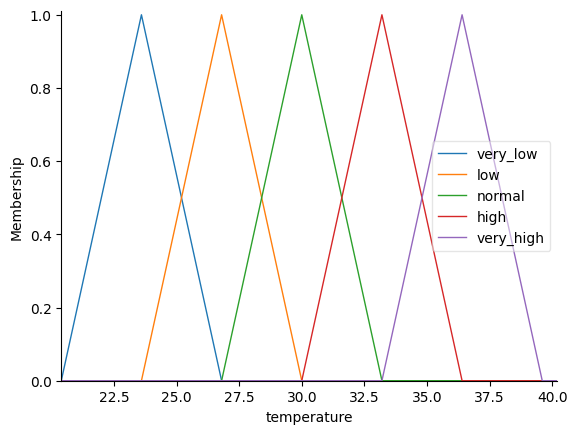

In [9]:
temperature.view()

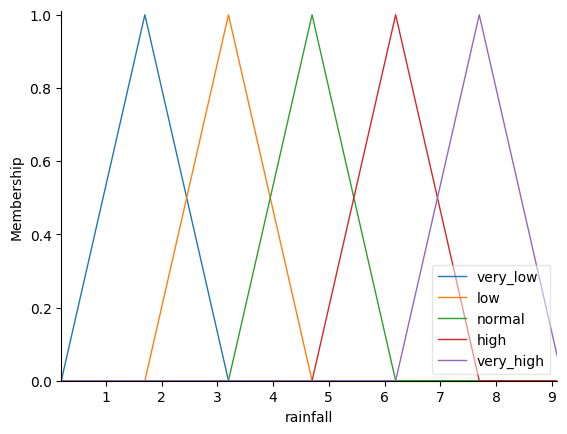

In [10]:
rainfall.view()

In [12]:
rule1=ctrl.Rule(wind['very_low']&temperature['very_low'],rainfall['very_low'])
rule2=ctrl.Rule(wind['low']&temperature['low'],rainfall['low'])
rule3=ctrl.Rule(wind['normal']&temperature['normal'],rainfall['normal'])
rule4=ctrl.Rule(wind['high']&temperature['high'],rainfall['high'])
rule5=ctrl.Rule(wind['very_high']&temperature['very_high'],rainfall['very_high'])
rule6=ctrl.Rule(wind['very_low']&temperature['low'],rainfall['very_low'])
rule7=ctrl.Rule(wind['low']&temperature['very_low'],rainfall['very_low'])
rule8=ctrl.Rule(wind['very_low']&temperature['normal'],rainfall['low'])
rule9=ctrl.Rule(wind['normal']&temperature['very_low'],rainfall['low'])
rule10=ctrl.Rule(wind['very_low']&temperature['high'],rainfall['low'])
rule11=ctrl.Rule(wind['high']&temperature['very_low'],rainfall['normal'])
rule12=ctrl.Rule(wind['very_low']&temperature['very_high'],rainfall['low'])
rule13=ctrl.Rule(wind['very_high']&temperature['very_low'],rainfall['normal'])
rule14=ctrl.Rule(wind['low']&temperature['normal'],rainfall['low'])
rule15=ctrl.Rule(wind['normal']&temperature['low'],rainfall['low'])
rule16=ctrl.Rule(wind['low']&temperature['high'],rainfall['normal'])
rule17=ctrl.Rule(wind['high']&temperature['low'],rainfall['normal'])
rule18=ctrl.Rule(wind['low']&temperature['very_high'],rainfall['normal'])
rule19=ctrl.Rule(wind['very_high']&temperature['low'],rainfall['normal'])
rule20=ctrl.Rule(wind['normal']&temperature['high'],rainfall['normal'])
rule21=ctrl.Rule(wind['high']&temperature['normal'],rainfall['normal'])
rule22=ctrl.Rule(wind['normal']&temperature['very_high'],rainfall['normal'])
rule23=ctrl.Rule(wind['very_high']&temperature['normal'],rainfall['high'])
rule24=ctrl.Rule(wind['high']&temperature['very_high'],rainfall['high'])
rule25=ctrl.Rule(wind['very_high']&temperature['high'],rainfall['very_high'])

4.699999999999999


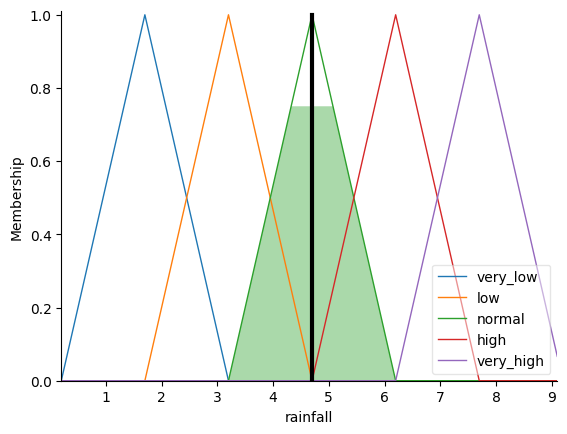

In [13]:
fuzzy_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
rainfalling = ctrl.ControlSystemSimulation(fuzzy_ctrl)
rainfalling.input['wind'] = 2.2
rainfalling.input['temperature'] = 30
rainfalling.compute()
print(rainfalling.output['rainfall'])
rainfall.view(sim=rainfalling)